In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
raw_data = pd.read_csv("forestfires.csv")

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
raw_data.sample(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
152,jul,sat,90.1,51.2,424.1,6.2,24.6,43,1.8,0.0,...,0,0,1,0,0,0,0,0,0,small
377,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,...,0,0,0,0,0,0,0,0,0,large
233,sep,tue,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,...,0,0,0,0,0,0,0,0,1,large
13,sep,mon,90.9,126.5,686.5,7.0,21.3,42,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
367,sep,tue,91.1,132.3,812.1,12.5,16.4,27,3.6,0.0,...,0,0,0,0,0,0,0,0,1,small
342,sep,mon,91.5,130.1,807.1,7.5,20.6,37,1.8,0.0,...,0,0,0,0,0,0,0,0,1,small
257,aug,sat,94.2,117.2,581.1,11.0,21.4,44,2.7,0.0,...,0,0,0,0,0,0,0,0,0,small
71,sep,fri,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,...,0,0,0,0,0,0,0,0,1,small
150,jun,fri,92.5,56.4,433.3,7.1,23.2,39,5.4,0.0,...,0,0,0,1,0,0,0,0,0,small
281,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,...,0,0,0,0,0,0,0,0,0,large


In [8]:
print(raw_data['area'].value_counts())

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64


In [9]:
raw_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
raw_data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [13]:
data = raw_data.replace(['small','large'],[0,1])
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
data.shape

(517, 31)

In [26]:
X = data.iloc[:,2:30]
Y = data.iloc[:,30]

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=28,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='sigmoid')) #4rd layer or output layer

In [29]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                580       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.1855 - val_accuracy: 0.9415
Epoch 2/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 0.9855 - val_loss: 0.1807 - val_accuracy: 0.9474
Epoch 3/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.2188 - val_accuracy: 0.9415
Epoch 4/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1554 - val_accuracy: 0.9708
Epoch 5/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1826 - val_accuracy: 0.9474
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.1988 - val_accuracy: 0.9474
Epoch 7/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.2437 - val_accuracy: 0.9415
Epoch 8/250
3

In [39]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9729
accuracy: 97.29%


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

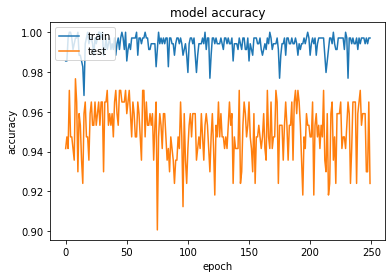

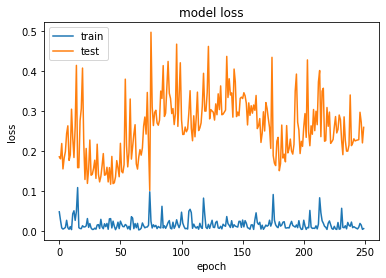

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()